In [7]:
try:
    import geometry_tools
except:
    !pip install -q git+https://github.com/tjweisman/geometry_tools
    import geometry_tools

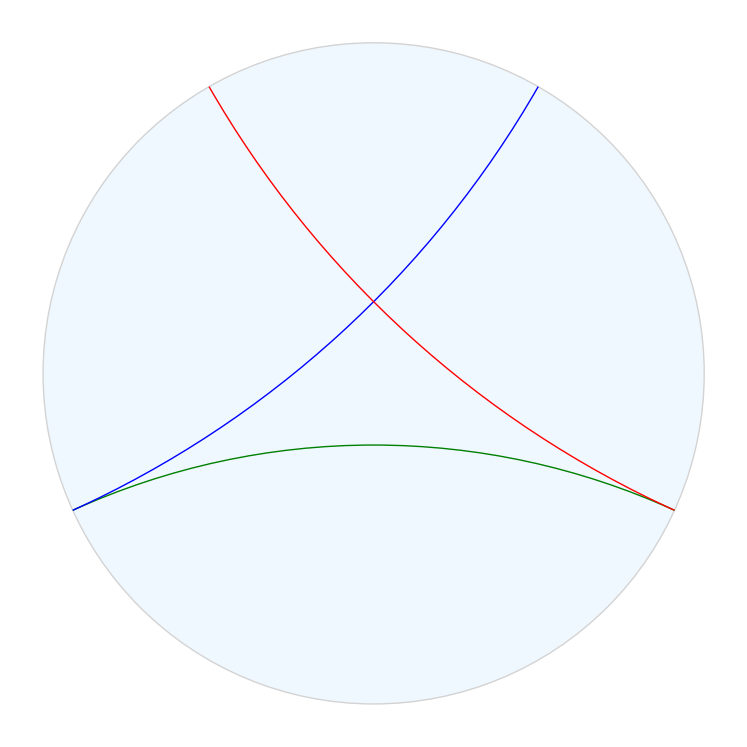

In [23]:
# get a representation for a triangle group.
# (these are built in to the program)
from geometry_tools import hyperbolic, coxeter, drawtools

triangle_rep = coxeter.TriangleGroup((1,2,1)).hyperbolic_rep()

reflections = triangle_rep.isometries(["a", "b", "c"])
walls = hyperbolic.Geodesic.from_reflection(reflections)

wall_a, wall_b, wall_c = walls

fig = drawtools.HyperbolicDrawing(model="poincare")
fig.draw_plane()

fig.draw_geodesic(wall_a, color="green")
fig.draw_geodesic(wall_b, color="blue")
fig.draw_geodesic(wall_c, color="red")

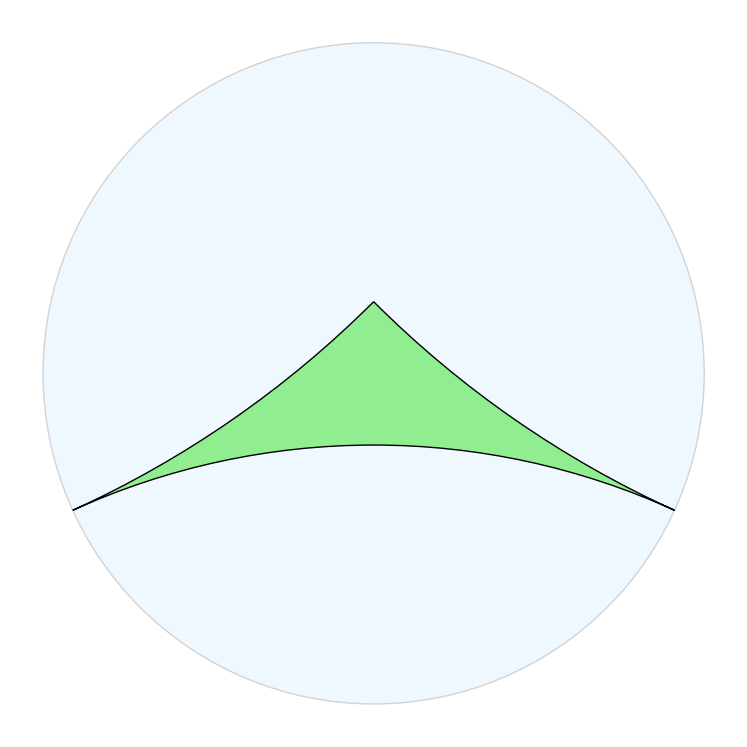

In [25]:
triangle_vertices = triangle_rep.isometries(["ab", "bc", "ac"]).fixed_point()

fund_triangle = hyperbolic.Polygon(triangle_vertices)

fig = drawtools.HyperbolicDrawing(model="poincare")

fig.draw_plane()
fig.draw_polygon(fund_triangle, facecolor="lightgreen")


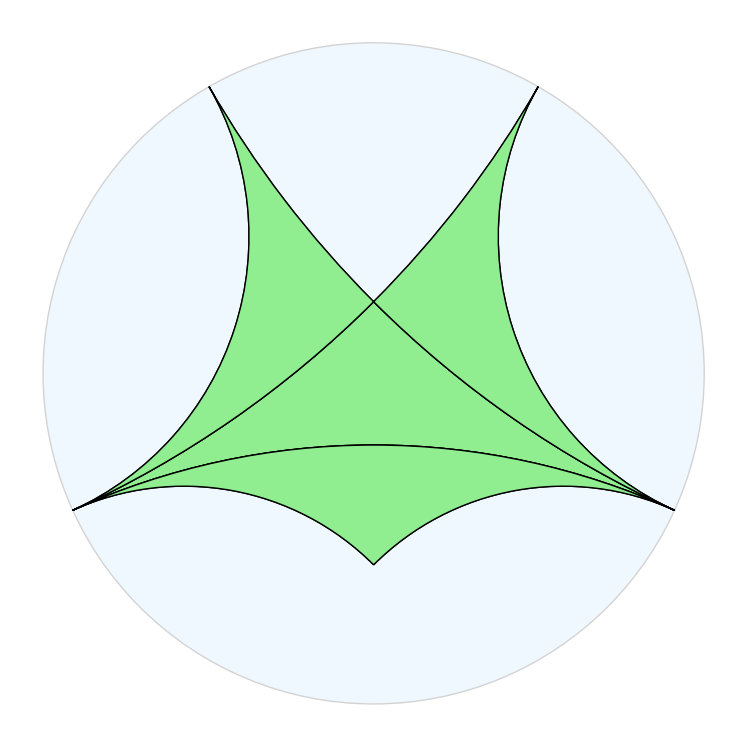

In [29]:
words = triangle_rep.free_words_less_than(2)
isometries = triangle_rep.isometries(words)

tiles = isometries @ fund_triangle

fig = drawtools.HyperbolicDrawing(model="poincare")
fig.draw_plane()

fig.draw_polygon(tiles, facecolor="lightgreen")


In [40]:
class QuadGroup(coxeter.CoxeterGroup):
    def __init__(self, vertex_params):
        w, x, y, z = vertex_params
        coxeter.CoxeterGroup.__init__(
            self, [
                ['a', 'b', w],
                ['b', 'c', x],
                ['c', 'd', y],
                ['d', 'a', z]
            ]
        )
        
group = QuadGroup([3, 3, 5, 7])

KeyError: 'c'